### Import libraries

In [42]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import f1_score

#### Read csv files

In [2]:
train_data = pd.read_csv('bank_customers_train.csv')
test_data = pd.read_csv('bank_customers_test.csv')

### Preprocessing & Feature Engineering On Train Data 

#### Getting some info from data 

In [3]:
train_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,35,blue-collar,single,high.school,NaN,no,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
1,52,blue-collar,married,NaN,NaN,yes,no,telephone,jun,thu,...,4,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no
2,38,services,married,high.school,NaN,no,no,telephone,jun,tue,...,2,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,no
3,44,admin.,married,university.degree,no,yes,no,telephone,oct,wed,...,1,999,0,nonexistent,-3.4,92.431,-26.9,0.735,5017.5,yes
4,25,services,divorced,basic.4y,no,yes,no,telephone,may,fri,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39188 entries, 0 to 39187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             39188 non-null  int64  
 1   job             38872 non-null  object 
 2   marital         39109 non-null  object 
 3   education       37535 non-null  object 
 4   default         31026 non-null  object 
 5   housing         38248 non-null  object 
 6   loan            38248 non-null  object 
 7   contact         39188 non-null  object 
 8   month           39188 non-null  object 
 9   day_of_week     39188 non-null  object 
 10  duration        39188 non-null  int64  
 11  campaign        39188 non-null  int64  
 12  pdays           39188 non-null  int64  
 13  previous        39188 non-null  int64  
 14  poutcome        39188 non-null  object 
 15  emp.var.rate    39188 non-null  float64
 16  cons.price.idx  39188 non-null  float64
 17  cons.conf.idx   39188 non-null 

In [49]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2000 non-null   int64  
 1   job             1986 non-null   object 
 2   marital         1999 non-null   object 
 3   education       1922 non-null   object 
 4   default         1565 non-null   object 
 5   housing         1950 non-null   object 
 6   loan            1950 non-null   object 
 7   contact         2000 non-null   object 
 8   month           2000 non-null   object 
 9   day_of_week     2000 non-null   object 
 10  duration        2000 non-null   int64  
 11  campaign        2000 non-null   int64  
 12  pdays           2000 non-null   int64  
 13  previous        2000 non-null   int64  
 14  poutcome        2000 non-null   object 
 15  emp.var.rate    2000 non-null   float64
 16  cons.price.idx  2000 non-null   float64
 17  cons.conf.idx   2000 non-null   f

In [5]:
train_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,39188.000000,39188.000000,39188.000000,39188.000000,39188.000000,39188.000000,39188.000000,39188.000000,39188.000000,39188.000000
mean,39.997754,258.125574,2.568720,962.588394,0.173191,0.079787,93.575327,-40.499862,3.618962,5166.920478
std,10.407876,258.683120,2.771971,186.631343,0.495921,1.571619,0.579311,4.631198,1.735424,72.290033
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,179.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,320.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
train_data['y'].value_counts()

no     34773
yes     4415
Name: y, dtype: int64

#### Handle Nan value

In [9]:

Nan_col=['job','marital','education','default','housing','loan']
for col in Nan_col :
    train_data[col].fillna(train_data[col].mode()[0],inplace=True)

#### Use Correlation Matrix for selecting feature

In [10]:

numerical_col =['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','y']
df_numerical = train_data[numerical_col]
df_numerical.replace({'yes':1,'no':0},inplace=True)

C:\Users\benya\AppData\Local\Temp\ipykernel_10500\3365883915.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numerical.replace({'yes':1,'no':0},inplace=True)


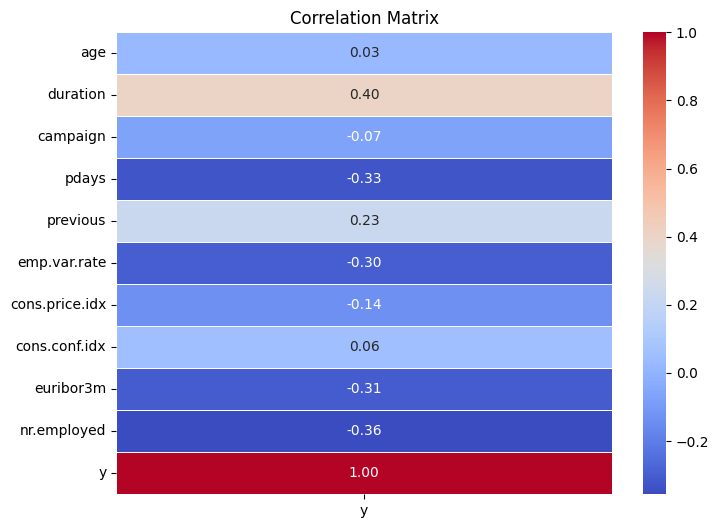

In [11]:
correlation_matrix = df_numerical.corr ()  
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix[['y']], annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

#### Check the distribution of feature 

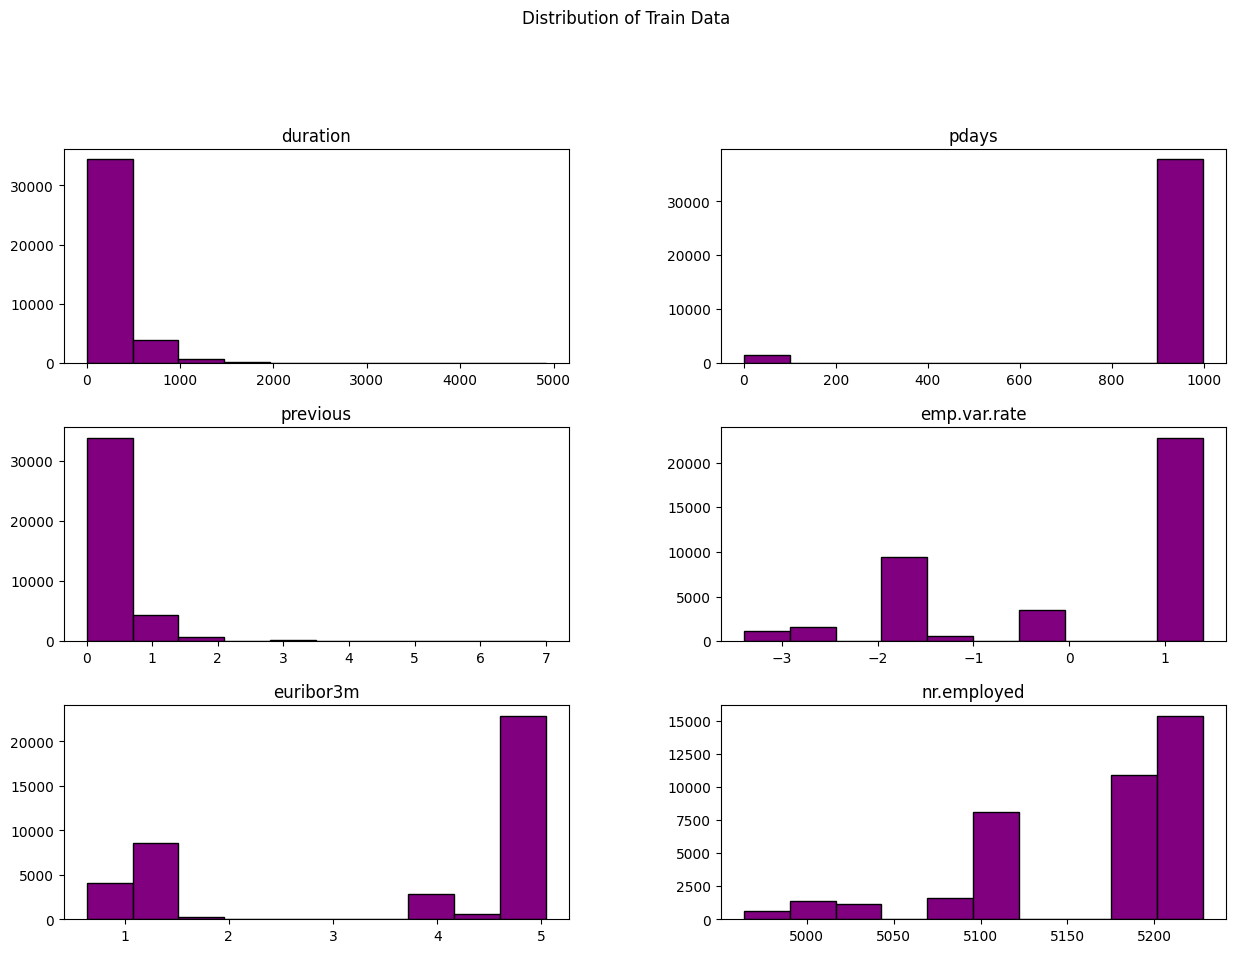

In [12]:
selected_numerical = ['duration','pdays','previous','emp.var.rate','euribor3m','nr.employed']

train_data[selected_numerical].hist(bins=10, color='purple', edgecolor='black', figsize=(15, 10), grid=False)
plt.suptitle('Distribution of Train Data', x=0.5, y=1.02, ha='center')
plt.show()

In [13]:

selected_feature = ['job','month','day_of_week','marital','education','default','housing','loan','y','duration','pdays','previous','emp.var.rate','euribor3m','nr.employed']
df = train_data[selected_feature]

#### Encoding Categorical columns & Scaling Numerical columns 

In [14]:

categorical_col=['job','month','day_of_week','marital','education','default','housing','loan','y']
for col in categorical_col :
    le=LabelEncoder()
    df[col] = le.fit_transform(df[col])


C:\Users\benya\AppData\Local\Temp\ipykernel_10500\405716797.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
C:\Users\benya\AppData\Local\Temp\ipykernel_10500\405716797.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
C:\Users\benya\AppData\Local\Temp\ipykernel_10500\405716797.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [16]:

scale = StandardScaler()
df[selected_numerical]=scale.fit_transform(df[selected_numerical])

C:\Users\benya\AppData\Local\Temp\ipykernel_10500\3341879046.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[selected_numerical]=scale.fit_transform(df[selected_numerical])


In [17]:
df.head()

,job,month,day_of_week,marital,education,default,housing,loan,y,duration,pdays,previous,emp.var.rate,euribor3m,nr.employed
0,1,3,2,2,3,0,0,0,0,-0.545561,0.195102,-0.349235,0.840044,0.771601,0.846317
1,1,4,2,1,6,0,1,0,0,-0.541695,0.195102,-0.349235,0.840044,0.773330,0.846317
2,7,4,3,1,3,0,0,0,0,-0.019814,0.195102,-0.349235,0.840044,0.717435,0.846317
3,0,8,4,1,6,0,1,0,1,1.897614,0.195102,-0.349235,-2.214170,-1.661841,-2.066985
4,7,6,0,0,0,0,1,0,0,1.325478,0.195102,-0.349235,0.649156,0.714554,0.333100


#### Split to Train and Test ( validation )

In [48]:
X = df.drop(['y'],axis=1)
y =df['y']
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


##### Use random over sample because the number of the yes its less than no 

In [49]:
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(x_train, y_train)


In [39]:
print('Original y value counts : ',y_train.value_counts())
print('Resampled y value counts',y_train_resampled.value_counts())

Original y value counts :  0    27815
1     3535
Name: y, dtype: int64
Resampled y value counts 0    27815
1    27815
Name: y, dtype: int64


#### Model data 

In [ ]:

base_classifier = RandomForestClassifier(n_estimators=10, random_state=42)
model = AdaBoostClassifier(base_estimator=base_classifier, n_estimators=200, random_state=42)
model.fit(X_train_resampled,y_train_resampled)


C:\Users\benya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


#### Evaluate model

In [ ]:
# evaluate model
y_pred = model.predict(x_test)
f1 = f1_score(y_test, y_pred, average='binary')  
print("F1 Score:", f1)

### Preprocessing On Test Data :

#### Selecting important feature and Handling Nan value

In [90]:
selected_test_feature = ['job','month','day_of_week','marital','education','default','housing','loan','duration','pdays','previous','emp.var.rate','euribor3m','nr.employed']
test_data= test_data[selected_test_feature]


In [91]:
Nan_col=['job','marital','education','default','housing','loan']
for col in Nan_col :
    test_data[col].fillna(test_data[col].mode()[0],inplace=True)

C:\Users\benya\AppData\Local\Temp\ipykernel_7744\3258504553.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[col].fillna(test_data[col].mode()[0],inplace=True)
C:\Users\benya\AppData\Local\Temp\ipykernel_7744\3258504553.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[col].fillna(test_data[col].mode()[0],inplace=True)
C:\Users\benya\AppData\Local\Temp\ipykernel_7744\3258504553.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

#### Enoding Categorical & Scaling Numerical Test Data Feature 

In [95]:
categorical_col=['job','month','day_of_week','marital','education','default','housing','loan']
for col in categorical_col :
    le=LabelEncoder()
    test_data[col] = le.fit_transform(test_data[col])
                                   
test_data[selected_numerical]=scale.transform(test_data[selected_numerical])


C:\Users\benya\AppData\Local\Temp\ipykernel_7744\1709191594.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[col] = le.fit_transform(test_data[col])
C:\Users\benya\AppData\Local\Temp\ipykernel_7744\1709191594.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[col] = le.fit_transform(test_data[col])
C:\Users\benya\AppData\Local\Temp\ipykernel_7744\1709191594.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col